## Imports

In [ ]:
%matplotlib inline
import scipy as sc
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from PIL import Image
from scipy import misc

## Read and Initialization

In [ ]:
data = misc.imread("stones_rgb.jpg")
size = data.shape[0]
id_size = data.shape[0]*data.shape[1]
plt.imshow(data)

R_VAL = 2
SIGMA = 10
LAMBDA = np.array([[0.299, 0.587, 0.114],[-0.14713, -0.28886, 0.436],[0.615, -0.51499, -0.10001]])

## Function Definitions

In [2]:
def get_id(x,y):
    '''
    gets coordinates of a pixel and return index of this pixel in adjacency matrix.
    
    x: x coordinate of a pixel
    y: y coordinate of a pixel
    '''
    return x*size+y

def get_coordinates(index):
    '''
    gets index of a pixel and return coordinates of that pixel.
    
    index: integer value
    '''
    return (index//size, index%size)

def sim(color1, color2):
    '''
    calculates similarity value between two given colors.
    
    color1: vector of integer numbers with 3 dimension
    color2: vector of integer numbers with 3 dimension
    '''
    color1 = np.array(color1)
    color2 = np.array(color2)
    c_diff = color1 + np.dot(-1,color2)
    n = np.sum(np.matmul(c_diff.T, np.matmul(LAMBDA, c_diff)))
    return np.exp(-n/(2*SIGMA**2))

def get_similarity(cord1, cord2):
    '''
    calculates and returns similarity between two given pixel coordinates.
    
    cord1: 2 tuple that stores x and y values.
    cord2: 2 tuple that stores x and y values.
    '''
    if (cord1!=cord2 and 
        np.abs(cord1[0]-cord2[0])<=R_VAL and 
        np.abs(cord1[1]-cord2[1])<=R_VAL):
        return sim(data[cord1], data[cord2])
    return 0

## Calculation of Weights matrix

Weights between pixels are calculated and stored with using methods that are defined above.

In [3]:
Weights = np.zeros([id_size, id_size])
for i in range(id_size):
    for j in range(id_size):
        Weights[i][j] = get_similarity(get_coordinates(i),
                                       get_coordinates(j))

In [4]:
W = Weights.copy()

## Calculations of Laplacian matrix

In [5]:
D = np.zeros(W.shape)
for i in range(W.shape[0]):
    D[i,i] = np.sum(W[i,:])
D = la.inv(np.sqrt(D))

L = np.matmul( np.matmul(D,W),D )

## Calculation of first 5 eigenvectors

In order to calculate eigenvectors we use the qr algorithm.

In [6]:
k = 5
R = np.random.randn(id_size, k)
[Q, R] = la.qr(R, mode="reduced")
for i in range(2000):
    Z = np.matmul(L,Q)
    [Q, R] = la.qr(Z, mode="reduced")

In [7]:
V = np.matmul(D,Q)

## Plotting

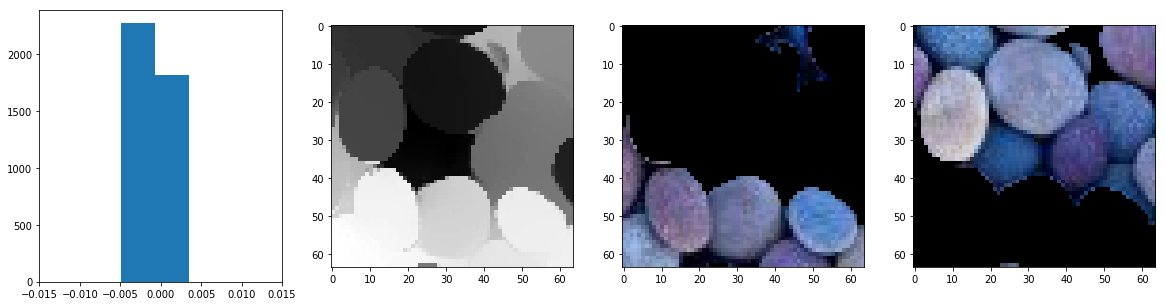

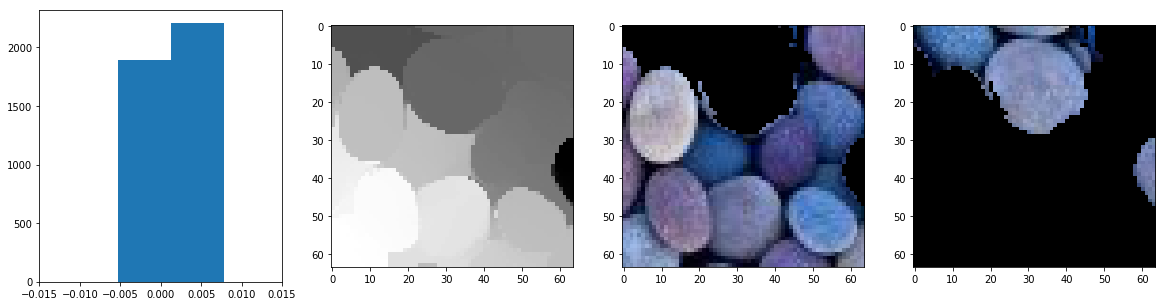

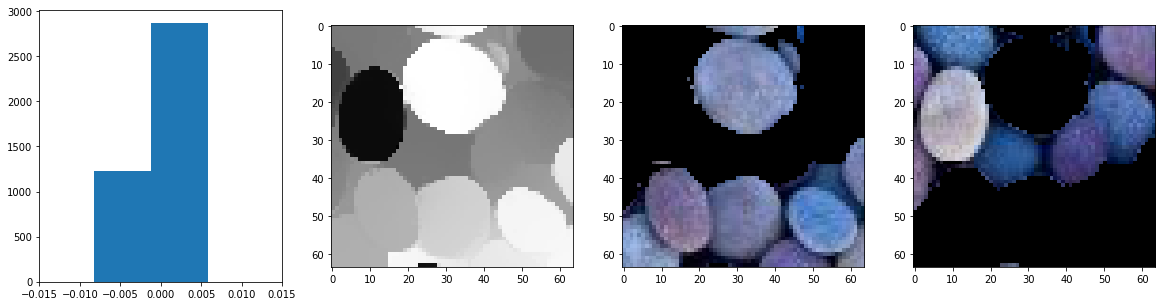

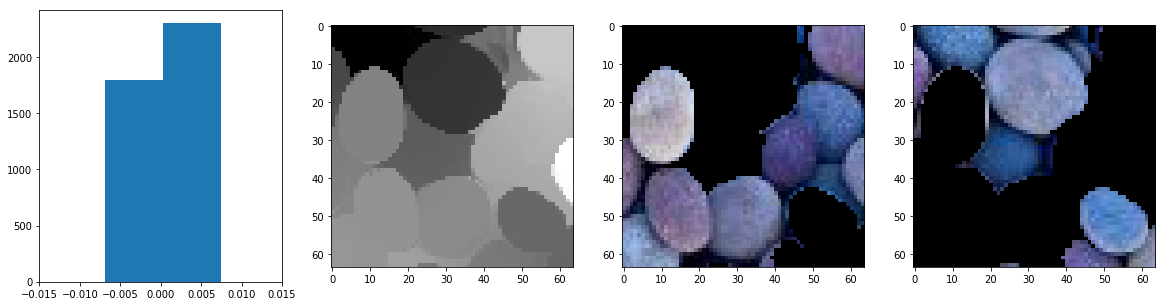

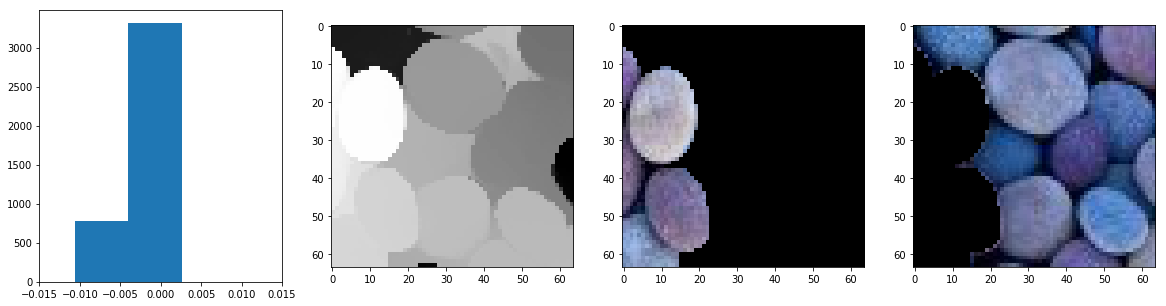

In [25]:
from scipy import stats

for i in range(k):
    Vk = V[:,i]
    cluster = np.reshape(Vk, (64,64))
    cl1 = cluster>0
    im1 = data.copy()
    im1[~cl1,:] = 0
    im2 = data.copy()
    im2[cl1,:] = 0
    
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1,4,1)
    plt.hist(Vk, bins=2)
    axes = plt.gca()
    axes.set_xlim([-0.015,0.015])
    
    plt.subplot(1,4,2)
    plt.imshow(cluster, 'gray')
    
    plt.subplot(1,4,3)
    plt.imshow(im1)
    
    plt.subplot(1,4,4)
    plt.imshow(im2)
    
    plt.show()

## Bonus Part

Image segmentation with using Kmeans algorithm and previously calculated eigenvectors.

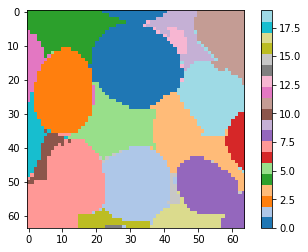

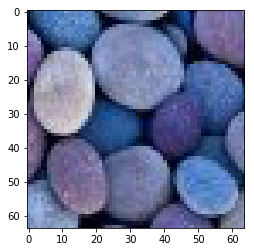

In [9]:
from sklearn.cluster import KMeans

pred = KMeans(n_clusters=20).fit_predict(V)
clusters = np.reshape(pred,newshape=(64,64))
plt.imshow(clusters,'tab20')
plt.colorbar()
plt.show()
plt.imshow(data)
plt.show()